In [1]:
# 宣告使用的套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\baris\Anaconda3\envs\rl_env\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


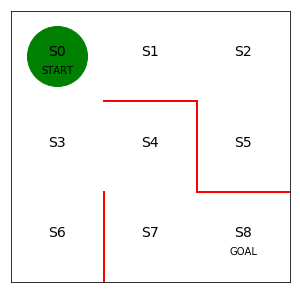

In [2]:
# 迷宮的初始狀態

# 宣告圖的大小與圖的變數名稱
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 繪製紅色牆壁
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 繪製代表狀態的文字S0～S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 設定繪圖範圍與塗銷刻度
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 於目前位置S0繪製綠色圓形
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 設定一開始採用何種策略的參數theta_0

# 列為狀態0～7、欄移動方向的↑、→、↓、←
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8是終點，所以不需採用任何策略
                    ])

In [10]:
# 定義利用softmax函數將策略參數theta轉換成行動策略pi的手法


def softmax_convert_into_pi_from_theta(theta):
    '''以softmax函數計算比例'''

    beta = 1.0
    [m, n] = theta.shape  # 取得theta的矩陣大小
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # 將theta轉換成exp(theta)

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 於simpleに計算比例的情況

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # 以softmax計算的情況

    pi = np.nan_to_num(pi)  # 將nan轉換成0

    return pi

In [4]:
# 計算初始的策略pi_0
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

NameError: name 'softmax_convert_into_pi_from_theta' is not defined

In [5]:
# 定義計算行動a與1step移動後的狀態s的函數


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # 依照pi[s,:]的機率選擇direction
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 往上移動時，代表狀態的數字減3
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 往右移動時，代表狀態的數字加1
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 往下移動時，代表狀態的數字加3
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 往左移動時，代表狀態的數字減1

    return [action, s_next]

In [6]:
# 定義走出迷宮的函數，輸出狀態與行動的履歷


def goal_maze_ret_s_a(pi):
    s = 0  # 起點
    s_a_history = [[0, np.nan]]  # 記錄智能體移動軌跡的list

    while (1):  # 抵達終點之前不斷執行的迴圈
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 代入目前狀態（是最後一個狀態，所以是index=-1）的行動

        s_a_history.append([next_s, np.nan])
        # 代入下一個狀態。還不知道會採取什麼行動，所以先設定為nan

        if next_s == 8:  # 若抵達終點就結束執行
            break
        else:
            s = next_s

    return s_a_history

In [15]:
# 以初始策略走出迷宮
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("走出迷宮的步數為" + str(len(s_a_history) - 1) + "喲")

[[0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 2], [3, 1], [4, 3], [3, 0], [0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 1], [4, 3], [3, 0], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
走出迷宮的步數為62喲


In [17]:
# 定義更新theta的函數


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 學習率
    T = len(s_a_history) - 1  # 抵達終點的總步數

    [m, n] = theta.shape  # 取得theta的矩陣大小
    delta_theta = theta.copy()  # 由於要製作Δtheta的來源與指標參照、所以不能直接寫成delta_theta = theta

    # 於每個元素計算delta_theta
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # 當theta不為nan的情況

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 從履歷取出狀態i的list包含式

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 取出於狀態i採用行動j

                N_i = len(SA_i)  # 於狀態i採取行動的總次數
                N_ij = len(SA_ij)  # 於狀態i採取行動j的次數
                
                # 初版的符號正負有誤（修正日期：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [18]:
# 更新策略
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49919355 0.50080645 0.        ]
 [0.         0.49798388 0.         0.50201612]
 [0.         0.         0.50040323 0.49959677]
 [0.3335125  0.33297501 0.3335125  0.        ]
 [0.         0.         0.49879032 0.50120968]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [19]:
# 以策略梯度法走出迷宮

# 初版的def update_theta有錯，所以調整結束執行的條件（修正日期：180703）
#若策略的改變比stop_epsilon = 10**-8  # 10^-8還少就結束學習
stop_epsilon = 10**-4  # 若策略的改變小於10^-4就結束學習


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # 在is_continue變成False之前持續執行
    s_a_history = goal_maze_ret_s_a(pi)  # 計算以策略π探索迷宮的履歷
    new_theta = update_theta(theta, pi, s_a_history)  # 更新參數Θ
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 更新策略π

    print(np.sum(np.abs(new_pi - pi)))  # 輸出策略的變化
    print("出走迷宮的總步數為" + str(len(s_a_history) - 1) + "喲")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.0057753628170908455
出走迷宮的總步數為76喲
0.01517238142467403
出走迷宮的總步數為48喲
0.007863964025521308
出走迷宮的總步數為110喲
0.00901188472773412
出走迷宮的總步數為92喲
0.013595464474667196
出走迷宮的總步數為74喲
0.00979514330255149
出走迷宮的總步數為34喲
0.02255768779429429
出走迷宮的總步數為18喲
0.005412184098101069
出走迷宮的總步數為102喲
0.008265573713624408
出走迷宮的總步數為26喲
0.01290545291692563
出走迷宮的總步數為38喲
0.021765035429095414
出走迷宮的總步數為12喲
0.024243435325240092
出走迷宮的總步數為8喲
0.019344845344700656
出走迷宮的總步數為18喲
0.01511430039460826
出走迷宮的總步數為54喲
0.03193188354433962
出走迷宮的總步數為6喲
0.01814770623166967
出走迷宮的總步數為12喲
0.007244817614959598
出走迷宮的總步數為178喲
0.012130874595365382
出走迷宮的總步數為38喲
0.010299824893255982
出走迷宮的總步數為36喲
0.009778953842731974
出走迷宮的總步數為174喲
0.02063931151781384
出走迷宮的總步數為8喲
0.03210612009284358
出走迷宮的總步數為6喲
0.006984587756486027
出走迷宮的總步數為46喲
0.01662603742957275
出走迷宮的總步數為46喲
0.014464351481375315
出走迷宮的總步數為24喲
0.008281762692567918
出走迷宮的總步數為74喲
0.01526758487492974
出走迷宮的總步數為24喲
0.023522309251335805
出走迷宮的總步數為12喲
0.008039173526665222
出走迷宮的總步數為88喲
0.020059990648079118
出走迷宮

出走迷宮的總步數為6喲
0.013716689609986538
出走迷宮的總步數為10喲
0.009309075711726428
出走迷宮的總步數為4喲
0.016478967970185193
出走迷宮的總步數為10喲
0.014547651698162356
出走迷宮的總步數為10喲
0.009362278132602833
出走迷宮的總步數為4喲
0.017699771528161823
出走迷宮的總步數為12喲
0.016239768283626943
出走迷宮的總步數為8喲
0.009422312934824706
出走迷宮的總步數為4喲
0.011028275430332982
出走迷宮的總步數為12喲
0.012279092199177763
出走迷宮的總步數為6喲
0.012743316828241924
出走迷宮的總步數為16喲
0.009839821710757563
出走迷宮的總步數為6喲
0.012700916945486862
出走迷宮的總步數為14喲
0.014404194571985898
出走迷宮的總步數為16喲
0.017824022148407642
出走迷宮的總步數為8喲
0.009673953900438778
出走迷宮的總步數為4喲
0.013142549237493611
出走迷宮的總步數為6喲
0.017598769790877725
出走迷宮的總步數為6喲
0.00955265886456498
出走迷宮的總步數為4喲
0.009317186192778493
出走迷宮的總步數為8喲
0.009497205613070867
出走迷宮的總步數為4喲
0.017420272210957224
出走迷宮的總步數為6喲
0.015442984470140267
出走迷宮的總步數為10喲
0.009479270345693527
出走迷宮的總步數為4喲
0.00936644329953254
出走迷宮的總步數為4喲
0.009255433976794306
出走迷宮的總步數為4喲
0.00914620740070736
出走迷宮的總步數為4喲
0.009813421757113583
出走迷宮的總步數為6喲
0.009025479376487844
出走迷宮的總步數為4喲
0.012043039046858592
出走迷宮

出走迷宮的總步數為6喲
0.004964465753244704
出走迷宮的總步數為4喲
0.004918128740675182
出走迷宮的總步數為4喲
0.0131099063676402
出走迷宮的總步數為6喲
0.004880073791408271
出走迷宮的總步數為4喲
0.004834923930897184
出走迷宮的總步數為4喲
0.015469139824404995
出走迷宮的總步數為18喲
0.0077920867701724295
出走迷宮的總步數為8喲
0.0070044872944022285
出走迷宮的總步數為6喲
0.0049150362036136375
出走迷宮的總步數為4喲
0.00486950640605599
出走迷宮的總步數為4喲
0.004824571496709326
出走迷宮的總步數為4喲
0.004780221709628565
出走迷宮的總步數為4喲
0.009774254886712436
出走迷宮的總步數為10喲
0.008521606760579198
出走迷宮的總步數為6喲
0.00483474411725697
出走迷宮的總步數為4喲
0.009199937748445158
出走迷宮的總步數為8喲
0.0048480566700829925
出走迷宮的總步數為4喲
0.00921509379089143
出走迷宮的總步數為8喲
0.006928096423756663
出走迷宮的總步數為6喲
0.004879008431387666
出走迷宮的總步數為4喲
0.004833879622618803
出走迷宮的總步數為4喲
0.008828221770744285
出走迷宮的總步數為6喲
0.00480687093125845
出走迷宮的總步數為4喲
0.004762648423682042
出走迷宮的總步數為4喲
0.013146023646435787
出走迷宮的總步數為14喲
0.00844007717329183
出走迷宮的總步數為6喲
0.014034885803580269
出走迷宮的總步數為8喲
0.01161619691490226
出走迷宮的總步數為8喲
0.004809171302073409
出走迷宮的總步數為4喲
0.008729723221024999
出走迷宮的總步數為6喲

0.008889222004172269
出走迷宮的總步數為8喲
0.006314592133731159
出走迷宮的總步數為8喲
0.0028093683699177766
出走迷宮的總步數為4喲
0.0027884833033231388
出走迷宮的總步數為4喲
0.0027678225465779943
出走迷宮的總步數為4喲
0.0027473830079157574
出走迷宮的總步數為4喲
0.002727161646662521
出走迷宮的總步數為4喲
0.007821568751452679
出走迷宮的總步數為8喲
0.0027549224635353836
出走迷宮的總步數為4喲
0.0027345893264783885
出走迷宮的總步數為4喲
0.002714473137908624
出走迷宮的總步數為4喲
0.0026945709271766483
出走迷宮的總步數為4喲
0.006392859194649186
出走迷宮的總步數為6喲
0.01047158231301222
出走迷宮的總步數為6喲
0.010978021897846524
出走迷宮的總步數為20喲
0.005507477601959486
出走迷宮的總步數為6喲
0.0027350483684418225
出走迷宮的總步數為4喲
0.0027149648148145286
出走迷宮的總步數為4喲
0.002695094452358507
出走迷宮的總步數為4喲
0.0026754343759338717
出走迷宮的總步數為4喲
0.0026559817278544798
出走迷宮的總步數為4喲
0.00937687317015426
出走迷宮的總步數為14喲
0.0026388212665816937
出走迷宮的總步數為4喲
0.0026197746859864743
出走迷宮的總步數為4喲
0.0026009270413169666
出走迷宮的總步數為4喲
0.0025822756614103867
出走迷宮的總步數為4喲
0.005400831415474885
出走迷宮的總步數為6喲
0.002591953701927628
出走迷宮的總步數為4喲
0.0025733651205723865
出走迷宮的總步數為4喲
0.0025549696230280153
出走迷宮的

0.0017184575832705357
出走迷宮的總步數為4喲
0.004321803437084236
出走迷宮的總步數為6喲
0.004608979306652702
出走迷宮的總步數為6喲
0.001740056685866409
出走迷宮的總步數為4喲
0.009145893583592364
出走迷宮的總步數為6喲
0.00173401722895105
出走迷宮的總步數為4喲
0.0017235532784193805
出走迷宮的總步數為4喲
0.009663683915086853
出走迷宮的總步數為8喲
0.001730887346552211
出走迷宮的總步數為4喲
0.0017204817230225128
出走迷宮的總步數為4喲
0.00458520004530541
出走迷宮的總步數為6喲
0.00462771934200782
出走迷宮的總步數為6喲
0.0017462654793214613
出走迷宮的總步數為4喲
0.0017357067679728208
出走迷宮的總步數為4喲
0.004933202720816515
出走迷宮的總步數為6喲
0.004345349830479198
出走迷宮的總步數為6喲
0.0017563468429032877
出走迷宮的總步數為4喲
0.0017456894659574826
出走迷宮的總步數為4喲
0.0017351270412791983
出走迷宮的總步數為4喲
0.0017246584663839493
出走迷宮的總步數為4喲
0.0017142826543767309
出走迷宮的總步數為4喲
0.0017039985336953362
出走迷宮的總步數為4喲
0.0016938050478567113
出走迷宮的總步數為4喲
0.0045839714202084575
出走迷宮的總步數為6喲
0.0016964732245956793
出走迷宮的總步數為4喲
0.001686355038611309
出走迷宮的總步數為4喲
0.004622337073233333
出走迷宮的總步數為6喲
0.0016899875508182838
出走迷宮的總步數為4喲
0.0016799316893940236
出走迷宮的總步數為4喲
0.001669963684019643
出走迷宮的總步數為

0.001316364904274843
出走迷宮的總步數為4喲
0.0013090376892949535
出走迷宮的總步數為4喲
0.0013017714193423943
出走迷宮的總步數為4喲
0.001294565426510512
出走迷宮的總步數為4喲
0.017380870532014987
出走迷宮的總步數為12喲
0.0012928985545395469
出走迷宮的總步數為4喲
0.0012857894403098952
出走迷宮的總步數為4喲
0.001278738722826682
出走迷宮的總步數為4喲
0.0012717457698259577
出走迷宮的總步數為4喲
0.001264809957458063
出走迷宮的總步數為4喲
0.008075730538450704
出走迷宮的總步數為6喲
0.0012594527008711678
出走迷宮的總步數為4喲
0.001252638901482965
出走迷宮的總步數為4喲
0.0012458801879438458
出走迷宮的總步數為4喲
0.0012391759727654536
出走迷宮的總步數為4喲
0.004012165560198386
出走迷宮的總步數為6喲
0.0012518558205771788
出走迷宮的總步數為4喲
0.0012450890069272552
出走迷宮的總步數為4喲
0.0012383768812717078
出走迷宮的總步數為4喲
0.0012317188604983598
出走迷宮的總步數為4喲
0.001225114369144166
出走迷宮的總步數為4喲
0.0012185628392754541
出走迷宮的總步數為4喲
0.0012120637103714277
出走迷宮的總步數為4喲
0.0034982117065460727
出走迷宮的總步數為6喲
0.0037250372144956023
出走迷宮的總步數為6喲
0.0012274336119770385
出走迷宮的總步數為4喲
0.004019669133956932
出走迷宮的總步數為6喲
0.006176824815042496
出走迷宮的總步數為10喲
0.0012703915204415328
出走迷宮的總步數為4喲
0.0012634659469286519
出

0.005309684031256624
出走迷宮的總步數為10喲
0.0008563960027287675
出走迷宮的總步數為4喲
0.0008525703523376664
出走迷宮的總步數為4喲
0.0008487704323673073
出走迷宮的總步數為4喲
0.0008449960121598779
出走迷宮的總步數為4喲
0.004255268114498216
出走迷宮的總步數為8喲
0.0008568055263120725
出走迷宮的總步數為4喲
0.0008529766498501998
出走迷宮的總步數為4喲
0.0008491735459557406
出走迷宮的總步數為4喲
0.0008453959832483426
出走迷宮的總步數為4喲
0.0008416437329392748
出走迷宮的總步數為4喲
0.0008379165687911402
出走迷宮的總步數為4喲
0.000834214267090131
出走迷宮的總步數為4喲
0.000830536606605415
出走迷宮的總步數為4喲
0.004435129299758679
出走迷宮的總步數為8喲
0.0008477509079326435
出走迷宮的總步數為4喲
0.0032394852573060205
出走迷宮的總步數為6喲
0.0042920326714489115
出走迷宮的總步數為8喲
0.0033001419808923634
出走迷宮的總步數為6喲
0.002995726663310775
出走迷宮的總步數為6喲
0.0008895072172368616
出走迷宮的總步數為4喲
0.0008854532735198296
出走迷宮的總步數為4喲
0.0008814271215506209
出走迷宮的總步數為4喲
0.0008774285076875339
出走迷宮的總步數為4喲
0.0008734571811682204
出走迷宮的總步數為4喲
0.0008695128940702096
出走迷宮的總步數為4喲
0.00086559540127399
出走迷宮的總步數為4喲
0.0008617044604233987
出走迷宮的總步數為4喲
0.0008578398318889562
出走迷宮的總步數為4喲
0.00085400127873295
出

0.000563208956016182
出走迷宮的總步數為4喲
0.0005611567064334917
出走迷宮的總步數為4喲
0.00055911574034051
出走迷宮的總步數為4喲
0.0005570859748691148
出走迷宮的總步數為4喲
0.000555067327909553
出走迷宮的總步數為4喲
0.0005530597181041264
出走迷宮的總步數為4喲
0.0005510630648373552
出走迷宮的總步數為4喲
0.0005490772882296574
出走迷宮的總步數為4喲
0.0005471023091273737
出走迷宮的總步數為4喲
0.0005451380490968417
出走迷宮的總步數為4喲
0.0005431844304146401
出走迷宮的總步數為4喲
0.004054751053305362
出走迷宮的總步數為8喲
0.0005562790828575678
出走迷宮的總步數為4喲
0.0005542584518069341
出走迷宮的總步數為4喲
0.0005522489057760462
出走迷宮的總步數為4喲
0.0005502503635039444
出走迷宮的總步數為4喲
0.0027793183638439023
出走迷宮的總步數為6喲
0.002832686511129945
出走迷宮的總步數為6喲
0.0005682988985344604
出走迷宮的總步數為4喲
0.0005662003733986343
出走迷宮的總步數為4喲
0.0005641135749740213
出走迷宮的總步數為4喲
0.0005620384156059186
出走迷宮的總步數為4喲
0.0005599748084578436
出走迷宮的總步數為4喲
0.0005579226675007931
出走迷宮的總步數為4喲
0.0005558819075068694
出走迷宮的總步數為4喲
0.0005538524440384385
出走迷宮的總步數為4喲
0.0005518341934409345
出走迷宮的總步數為4喲
0.0005498270728315664
出走迷宮的總步數為4喲
0.0032545747118725675
出走迷宮的總步數為8喲
0.000554807984234840

0.00044226150383254795
出走迷宮的總步數為4喲
0.00044078479526324724
出走迷宮的總步數為4喲
0.0004393156113254859
出走迷宮的總步數為4喲
0.0004378539004311448
出走迷宮的總步數為4喲
0.00043639961143662753
出走迷宮的總步數為4喲
0.00043495269363704597
出走迷宮的總步數為4喲
0.00043351309676097766
出走迷宮的總步數為4喲
0.0004320807709687173
出走迷宮的總步數為4喲
0.00043065566684601445
出走迷宮的總步數為4喲
0.00042923773539793597
出走迷宮的總步數為4喲
0.0004278269280499625
出走迷宮的總步數為4喲
0.0004264231966370699
出走迷宮的總步數為4喲
0.0004250264934052561
出走迷宮的總步數為4喲
0.00042363677100206235
出走迷宮的總步數為4喲
0.0023978446959512373
出走迷宮的總步數為6喲
0.0004294984952328794
出走迷宮的總步數為4喲
0.0004280854867801387
出走迷宮的總步數為4喲
0.000426679567717584
出走迷宮的總步數為4喲
0.00042528069022976234
出走迷宮的總步數為4喲
0.00042388880690410677
出走迷宮的總步數為4喲
0.00042250387073167195
出走迷宮的總步數為4喲
0.0004211258350960839
出走迷宮的總步數為4喲
0.0004197546537740883
出走迷宮的總步數為4喲
0.00041839028093138345
出走迷宮的總步數為4喲
0.0021616449213257144
出走迷宮的總步數為6喲
0.0004231142779270343
出走迷宮的總步數為4喲
0.00042173277413498286
出走迷宮的總步數為4喲
0.0004203581460785408
出走迷宮的總步數為4喲
0.00041899034778544036
出走迷宮的總步數為4喲
0

0.0020027645668170453
出走迷宮的總步數為6喲
0.00033822965828294443
出走迷宮的總步數為4喲
0.00033722752507090933
出走迷宮的總步數為4喲
0.00033622994066362724
出走迷宮的總步數為4喲
0.0003352368772525788
出走迷宮的總步數為4喲
0.002197795274875871
出走迷宮的總步數為6喲
0.00034063258948085
出走迷宮的總步數為4喲
0.0023670824311861523
出走迷宮的總步數為6喲
0.0003459631584937957
出走迷宮的總步數為4喲
0.002418881536201095
出走迷宮的總步數為6喲
0.000351648463527119
出走迷宮的總步數為4喲
0.00035057692796988324
出走迷宮的總步數為4喲
0.00034951040646548706
出走迷宮的總步數為4喲
0.00034844886737626576
出走迷宮的總步數為4喲
0.00034739227931953123
出走迷宮的總步數為4喲
0.0003463406111570873
出走迷宮的總步數為4喲
0.00034529383199724886
出走迷宮的總步數為4喲
0.00034425191119332246
出走迷宮的總步數為4喲
0.00034321481833696557
出走迷宮的總步數為4喲
0.001606100422530496
出走迷宮的總步數為6喲
0.00034396439595305375
出走迷宮的總步數為4喲
0.00034293311769406296
出走迷宮的總步數為4喲
0.00034190658185699607
出走迷宮的總步數為4喲
0.00034088475904333823
出走迷宮的總步數為4喲
0.006135642425832567
出走迷宮的總步數為6喲
0.0003409177585426276
出走迷宮的總步數為4喲
0.00033990420786165695
出走迷宮的總步數為4喲
0.002409312943797568
出走迷宮的總步數為6喲
0.002188307225312495
出走迷宮的總步數為6喲
0.000351

0.00022865123100191537
出走迷宮的總步數為4喲
0.0018173217847423425
出走迷宮的總步數為6喲
0.00023254424868678417
出走迷宮的總步數為4喲
0.00023198906018051697
出走迷宮的總步數為4喲
0.00023143587998045688
出走迷宮的總步數為4喲
0.00023088469835566214
出走迷宮的總步數為4喲
0.00023033550563216453
出走迷宮的總步數為4喲
0.000229788292195875
出走迷宮的總步數為4喲
0.00022924304849126012
出走迷宮的總步數為4喲
0.00022869976501991435
出走迷宮的總步數為4喲
0.0002281584323401767
出走迷宮的總步數為4喲
0.00022761904106906317
出走迷宮的總步數為4喲
0.0002270815818778034
出走迷宮的總步數為4喲
0.00022654604549599
出走迷宮的總步數為4喲
0.0002260124227074882
出走迷宮的總步數為4喲
0.00022548070435158933
出走迷宮的總步數為4喲
0.0002249508813229207
出走迷宮的總步數為4喲
0.00022442294457096848
出走迷宮的總步數為4喲
0.00022389688509795967
出走迷宮的總步數為4喲
0.00022337269396075984
出走迷宮的總步數為4喲
0.00022285036227047243
出走迷宮的總步數為4喲
0.00022232988118904562
出走迷宮的總步數為4喲
0.00022181124193281117
出走迷宮的總步數為4喲
0.00022129443576949723
出走迷宮的總步數為4喲
0.00022077945401859263
出走迷宮的總步數為4喲
0.00022026628805159668
出走迷宮的總步數為4喲
0.00021975492929019944
出走迷宮的總步數為4喲
0.00021924536920864442
出走迷宮的總步數為4喲
0.0002187375993286493
出走迷宮的總步數

出走迷宮的總步數為4喲
0.00019269076021581621
出走迷宮的總步數為4喲
0.00019227241760952883
出走迷宮的總步數為4喲
0.0001918554479749448
出走迷宮的總步數為4喲
0.00019143984528955174
出走迷宮的總步數為4喲
0.00019102560356600538
出走迷宮的總步數為4喲
0.0001906127168468455
出走迷宮的總步數為4喲
0.00019020117920981808
出走迷宮的總步數為4喲
0.00018979098476318117
出走迷宮的總步數為4喲
0.00018938212764813694
出走迷宮的總步數為4喲
0.00018897460203752027
出走迷宮的總步數為4喲
0.0001885684021365481
出走迷宮的總步數為4喲
0.00018816352218115756
出走迷宮的總步數為4喲
0.00018775995643788984
出走迷宮的總步數為4喲
0.0014519600486293943
出走迷宮的總步數為6喲
0.00019028202170240371
出走迷宮的總步數為4喲
0.00018987107960377787
出走迷宮的總步數為4喲
0.00018946147991765264
出走迷宮的總步數為4喲
0.00018905321678064357
出走迷宮的總步數為4喲
0.00018864628436065893
出走迷宮的總步數為4喲
0.00018824067685847302
出走迷宮的總步數為4喲
0.0001878363885055665
出走迷宮的總步數為4喲
0.00018743341356525917
出走迷宮的總步數為4喲
0.00018703174633231782
出走迷宮的總步數為4喲
0.0001866313811310586
出走迷宮的總步數為4喲
0.00018623231231849023
出走迷宮的總步數為4喲
0.00018583453428153152
出走迷宮的總步數為4喲
0.00018543804143664883
出走迷宮的總步數為4喲
0.00018504282823108946
出走迷宮的總步數為4喲
0.000184648889

0.0001454520241090003
出走迷宮的總步數為4喲
0.00014517729114080224
出走迷宮的總步數為4喲
0.00014490334547320217
出走迷宮的總步數為4喲
0.00014463018408076254
出走迷宮的總步數為4喲
0.0055491550539522785
出走迷宮的總步數為6喲
0.00014502959582595072
出走迷宮的總步數為4喲
0.0001447570664488869
出走迷宮的總步數為4喲
0.0001444853136209536
出走迷宮的總步數為4喲
0.0001442143343731942
出走迷宮的總步數為4喲
0.00014394412575107277
出走迷宮的總步數為4喲
0.0013442080372231217
出走迷宮的總步數為6喲
0.00014580313255109674
出走迷宮的總步數為4喲
0.00014552845050187432
出走迷宮的總步數為4喲
0.00014525455272866063
出走迷宮的總步數為4喲
0.00014498143623003883
出走迷宮的總步數為4喲
0.00014470909801546014
出走迷宮的總步數為4喲
0.00014443753511287662
出走迷宮的總步數為4喲
0.00014416674456166519
出走迷宮的總步數為4喲
0.00014389672341534945
出走迷宮的總步數為4喲
0.00014362746874300308
出走迷宮的總步數為4喲
0.00014335897762689058
出走迷宮的總步數為4喲
0.00014309124716273443
出走迷宮的總步數為4喲
0.0001428242744618332
出走迷宮的總步數為4喲
0.00014255805664661544
出走迷宮的總步數為4喲
0.0001422925908553304
出走迷宮的總步數為4喲
0.00014202787423868955
出走迷宮的總步數為4喲
0.0014304868994488556
出走迷宮的總步數為6喲
0.001363496116674712
出走迷宮的總步數為6喲
0.00014674950820502304
出走迷宮的總步數

0.0001532046204059702
出走迷宮的總步數為4喲
0.00015290738893899633
出走迷宮的總步數為4喲
0.00015261103012886336
出走迷宮的總步數為4喲
0.00015231554054892342
出走迷宮的總步數為4喲
0.00015202091678949425
出走迷宮的總步數為4喲
0.00015172715545548263
出走迷宮的總步數為4喲
0.00015143425317123461
出走迷宮的總步數為4喲
0.0001511422065757339
出走迷宮的總步數為4喲
0.00015085101232521075
出走迷宮的總步數為4喲
0.00015056066709209434
出走迷宮的總步數為4喲
0.00015027116756452345
出走迷宮的總步數為4喲
0.0001499825104476285
出走迷宮的總步數為4喲
0.00981669082377946
出走迷宮的總步數為8喲
0.00015015123424351635
出走迷宮的總步數為4喲
0.00014986368425185838
出走迷宮的總步數為4喲
0.0013698177646466886
出走迷宮的總步數為6喲
0.00015179012621013496
出走迷宮的總步數為4喲
0.00015149786517982405
出走迷宮的總步數為4喲
0.0001512064551610088
出走迷宮的總步數為4喲
0.00015091589284078194
出走迷宮的總步數為4喲
0.00015062617492152958
出走迷宮的總步數為4喲
0.00015033729812153653
出走迷宮的總步數為4喲
0.00015004925917632382
出走迷宮的總步數為4喲
0.00014976205483488957
出走迷宮的總步數為4喲
0.00014947568186384104
出走迷宮的總步數為4喲
0.00014919013704560967
出走迷宮的總步數為4喲
0.0001489054171770251
出走迷宮的總步數為4喲
0.00014862151907026055
出走迷宮的總步數為4喲
0.00014833843955474116
出走迷宮的總

0.00012912844067236584
出走迷宮的總步數為4喲
0.00012889653242783086
出走迷宮的總步數為4喲
0.0001286652568223412
出走迷宮的總步數為4喲
0.00012843461154164737
出走迷宮的總步數為4喲
0.00012820459427993758
出走迷宮的總步數為4喲
0.00012797520274402535
出走迷宮的總步數為4喲
0.00012774643464872996
出走迷宮的總步數為4喲
0.00012751828772221072
出走迷宮的總步數為4喲
0.00012729075970102643
出走迷宮的總步數為4喲
0.00012706384833268726
出走迷宮的總步數為4喲
0.00012683755137437788
出走迷宮的總步數為4喲
0.0011855511032130336
出走迷宮的總步數為6喲
0.00012824320382678195
出走迷宮的總步數為4喲
0.00012801412221048053
出走迷宮的總步數為4喲
0.00012778566135565605
出走迷宮的總步數為4喲
0.0001275578190086859
出走迷宮的總步數為4喲
0.00012733059292533225
出走迷宮的總步數為4喲
0.00012710398087171018
出走迷宮的總步數為4喲
0.0001268779806244437
出走迷宮的總步數為4喲
0.00012665258996897265
出走迷宮的總步數為4喲
0.00012642780670305172
出走迷宮的總步數為4喲
0.00012620362863256102
出走迷宮的總步數為4喲
0.0001259800535733241
出走迷宮的總步數為4喲
0.0001257570793527455
出走迷宮的總步數為4喲
0.00012553470380549311
出走迷宮的總步數為4喲
0.00012531292477853916
出走迷宮的總步數為4喲
0.0001250917401263655
出走迷宮的總步數為4喲
0.0001248711477149292
出走迷宮的總步數為4喲
0.00012465114541817743
出走迷宮的

0.001805053460474354
出走迷宮的總步數為8喲
0.00011419699070243372
出走迷宮的總步數為4喲
0.00011400348328613648
出走迷宮的總步數為4喲
0.00011381047379892262
出走迷宮的總步數為4喲
0.00011361796052270987
出走迷宮的總步數為4喲
0.00011342594174704526
出走迷宮的總步數為4喲
0.00011323441576927516
出走迷宮的總步數為4喲
0.00011304338089353563
出走迷宮的總步數為4喲
0.00011285283543132317
出走迷宮的總步數為4喲
0.00011266277770180522
出走迷宮的總步數為4喲
0.00011247320603131536
出走迷宮的總步數為4喲
0.00011228411875213208
出走迷宮的總步數為4喲
0.0001120955142060228
出走迷宮的總步數為4喲
0.00011190739073979952
出走迷宮的總步數為4喲
0.00011171974670904326
出走迷宮的總步數為4喲
0.0012570162199991661
出走迷宮的總步數為6喲
0.00011368687685599059
出走迷宮的總步數為4喲
0.00011349431879315898
出走迷宮的總步數為4喲
0.00011330225637167825
出走迷宮的總步數為4喲
0.00011311068787777517
出走迷宮的總步數為4喲
0.00011291961160929745
出走迷宮的總步數為4喲
0.00011272902586849723
出走迷宮的總步數為4喲
0.00011253892896592038
出走迷宮的總步數為4喲
0.0011565811036630593
出走迷宮的總步數為6喲
0.00011426692764696794
出走迷宮的總步數為4喲
0.00011407259413651581
出走迷宮的總步數為4喲
0.00011387876322886681
出走迷宮的總步數為4喲
0.0001136854331787035
出走迷宮的總步數為4喲
0.00011349260224891543
出走迷

出走迷宮的總步數為4喲
0.00010014743763785139
出走迷宮的總步數為4喲
9.998851573334022e-05
出走迷宮的總步數為4喲


In [20]:
# 確認最終策略
np.set_printoptions(precision=3, suppress=True)  # 有效位數3，不顯示指數的設定
print(pi)

[[0.    0.008 0.992 0.   ]
 [0.    0.309 0.    0.691]
 [0.    0.    0.422 0.578]
 [0.01  0.978 0.013 0.   ]
 [0.    0.    0.984 0.016]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.017 0.983 0.    0.   ]]


In [13]:
# 將智能體的移動軌跡製作成動畫
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 初始化背景影像
    line.set_data([], [])
    return (line,)


def animate(i):
    # 每個影格的繪製內容
    state = s_a_history[i][0]  # 繪製目前的位置
    x = (state % 3) + 0.5  # 狀態的x座標為以3除之的餘數+0.5
    y = 2.5 - int(state / 3)  # y座標為2.5減掉以3除之的商數
    line.set_data(x, y)
    return (line,)


#　以初始化函數與繪製每格影格內容的繪圖函數繪製動畫
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())